### Linear regression from scratch using OLS

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import copy
import seaborn as sns
from sklearn.model_selection import train_test_split

In [50]:
train_data=pd.read_csv('/Users/pushpakumar/Downloads/cs-215-assignment-3-multiple-variate-regression/train.csv')
# test_data=pd.read_csv('/Users/pushpakumar/Downloads/cs-215-assignment-3-multiple-variate-regression/test.csv')

In [51]:
print(train_data.head())

   id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0  639.0       25.0      0.50     0.25     0.75   0.63              94.6   
1   1  124.0       12.5      0.25     0.25     0.25   0.25              77.4   
2   2  485.0       25.0      0.50     0.25     0.38   0.75              94.6   
3   3  324.0       12.5      0.25     0.25     0.75   0.75              94.6   
4   4  235.0       12.5      0.25     0.25     0.50   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              57.2                  79.0              68.2              33.0   
1              46.8                  64.7              55.8              27.0   
2              57.2                  79.0              68.2              33.0   
3              57.2                  79.0              68.2              33.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  Raining

In [52]:
train_corr=train_data.corr()
target = 'yield'
correlation_with_target = train_corr[target]
low_corr_threshold = 0.2
low_corr_features = correlation_with_target[abs(correlation_with_target) < low_corr_threshold].index.tolist()
train_data = train_data.drop(columns=low_corr_features)
x= train_data.drop(columns='yield')
y = train_data['yield']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14250, 7)
(750, 7)
(14250,)
(750,)


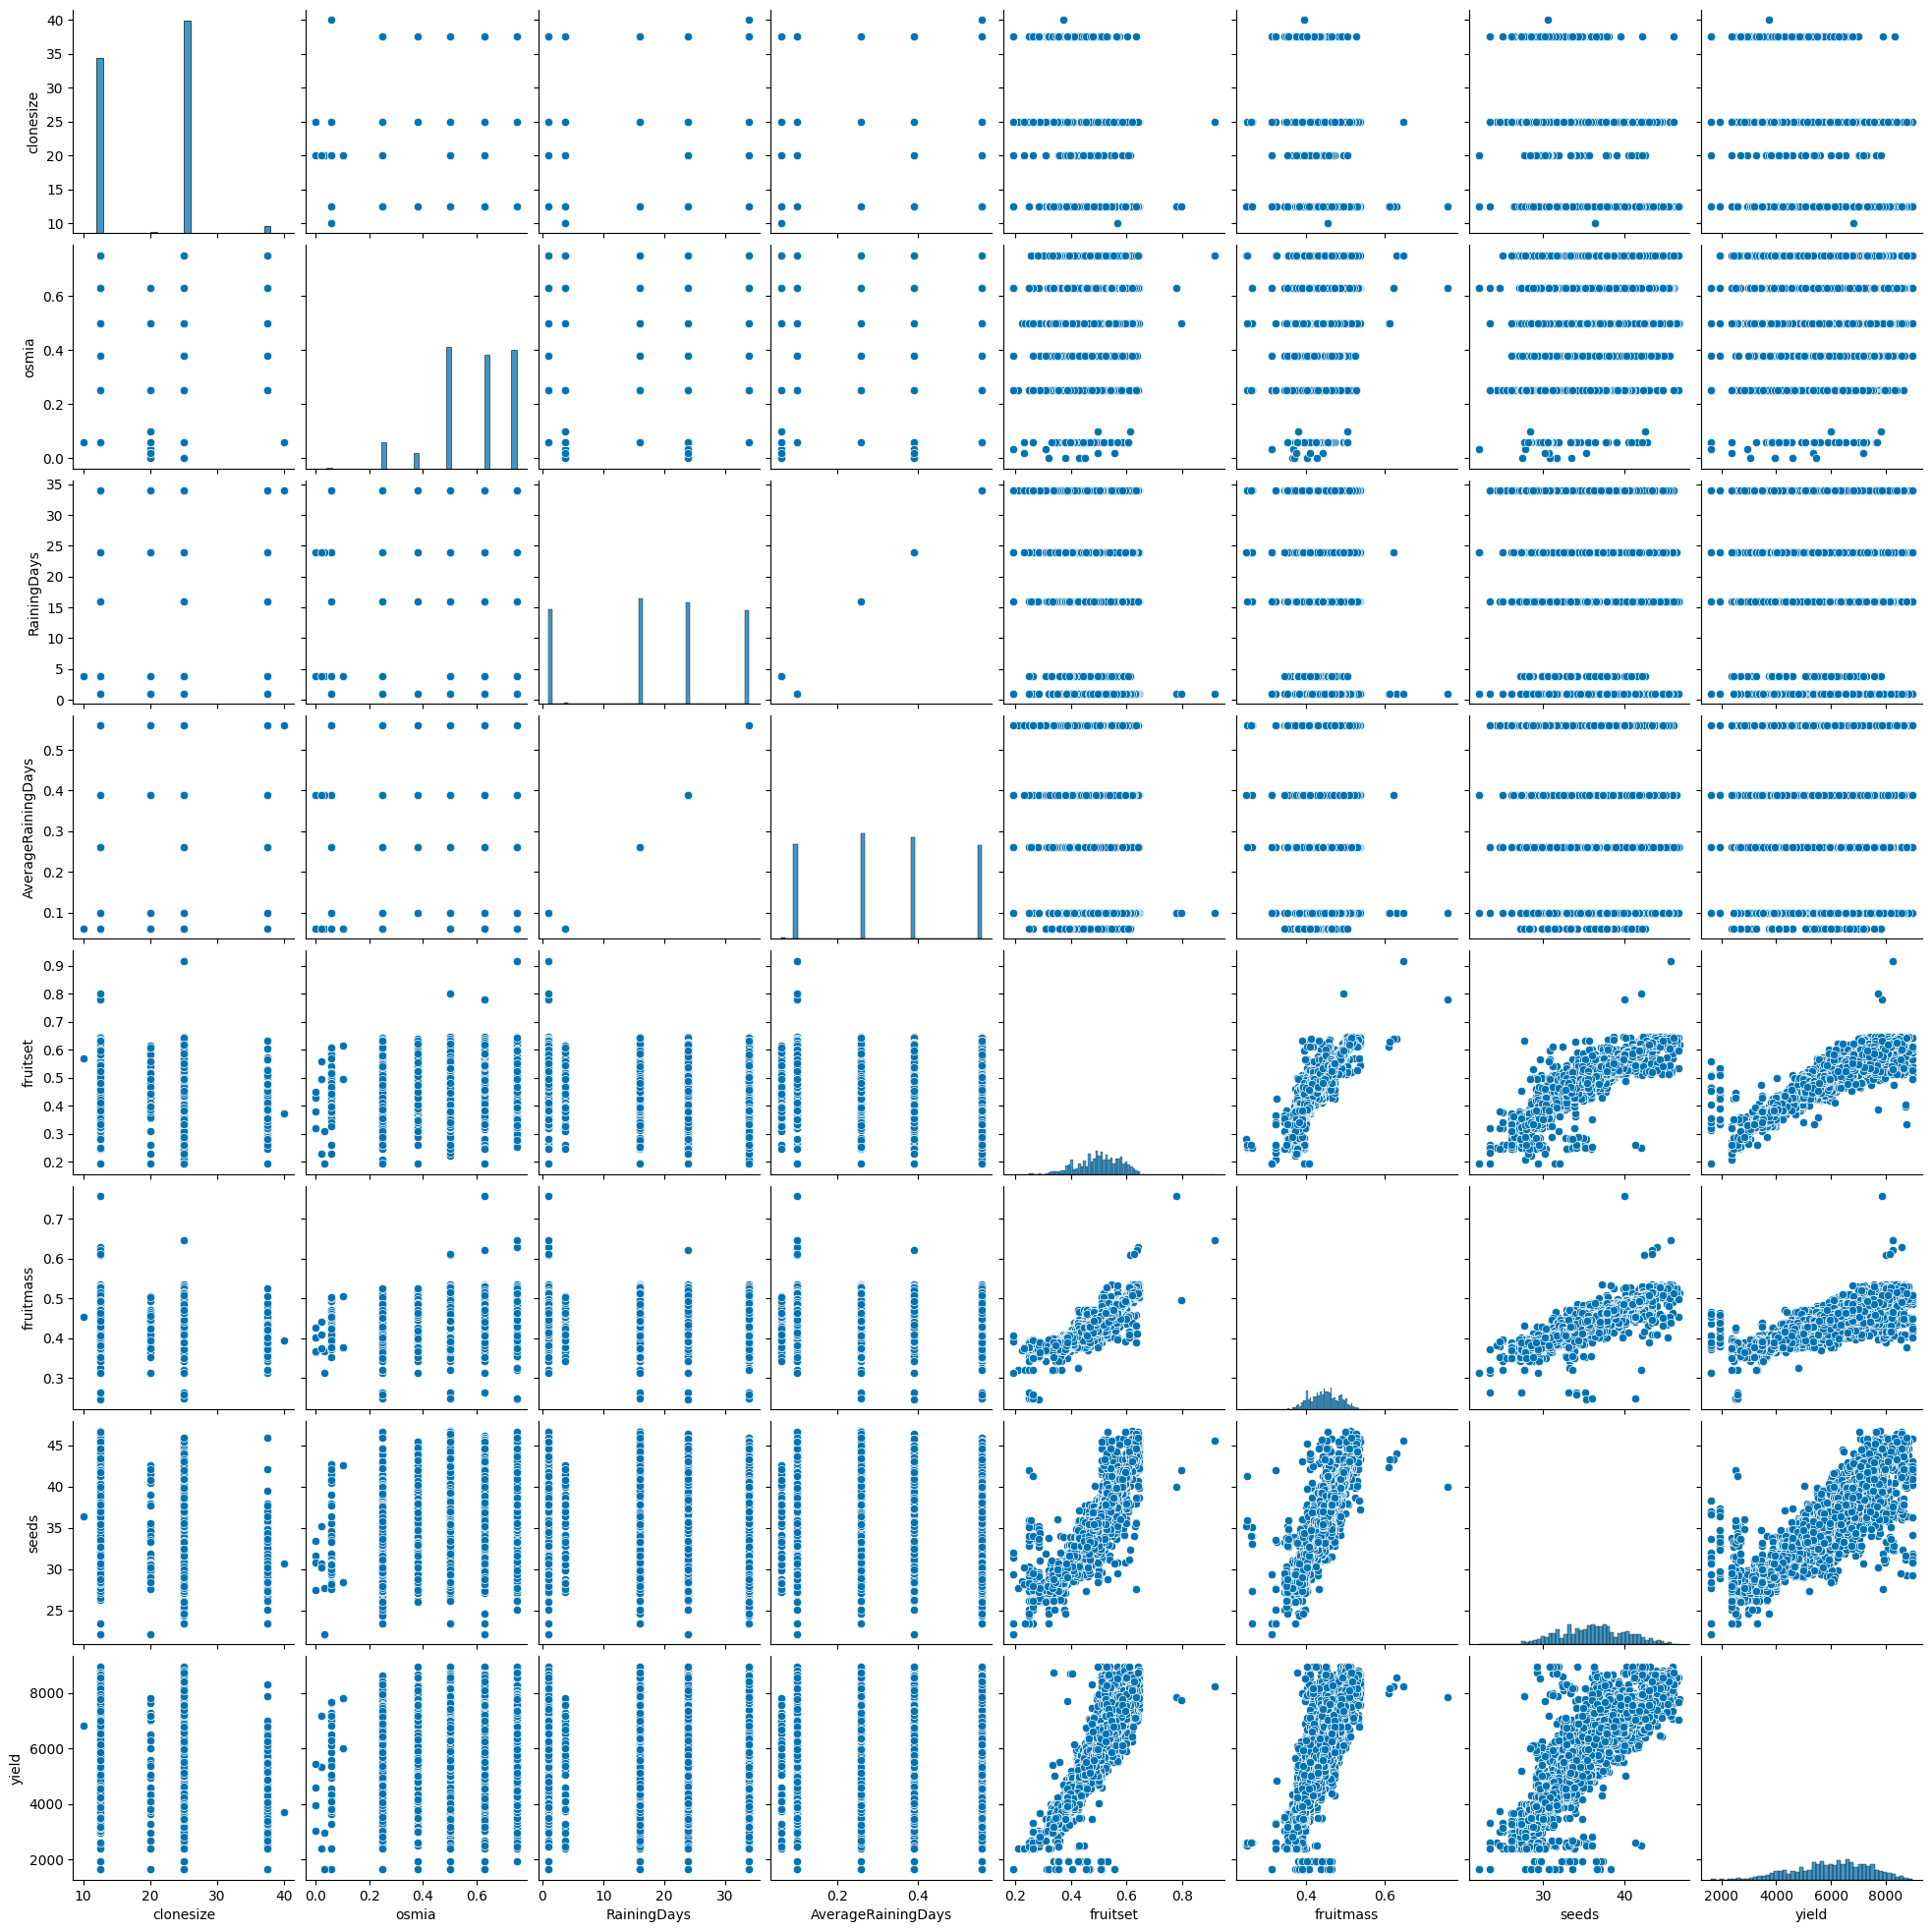

In [54]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=train_data)

In [55]:
### note input x and y should be panda df

class Multiple_linear_regression():
    def __init__(self):
        self.coefficients=None
        self.intercept=None
        
    def fit(self,x,y):
        x=self.transform_x(x)
        y=self.transform_y(y)
        betas=self.estimate_coefficients(x,y)
        self.intercept=betas[0]
        self.coefficients=betas[1:]

            
    def predict(self,x):
        ## y = b_0 + b_1*x + ... + b_i*x_i
        prediction=[]
        for index,row in x.iterrows():
            val=row.values
            
            pred=np.multiply(val,self.coefficients)
            pred=sum(pred)
            pred+=self.intercept
            prediction.append(pred)

        return prediction
    
    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values=y_true.values
        y_avg=np.mean(y_values)
        
        residual_sum_of_squares=0
        total_sum_of_squares=0
        for i in range(len(y_values)):
            residual_sum_of_squares+=(y_values[i]-y_pred[i])**2
            total_sum_of_squares+=(y_values[i]-y_avg)**2
            
        return 1-(residual_sum_of_squares/total_sum_of_squares)
    
    def transform_x(self,x):
        x = copy.deepcopy(x)
        x.insert(0, 'ones', np.ones( (x.shape[0], 1) ))
        return x.values
    def transform_y(self,y):
        y_copy=copy.deepcopy(y)
        return y_copy.values
    def estimate_coefficients(self,x,y):
        # (x'x)^-1 x'y 
        xT=x.transpose()
        inversed=np.linalg.inv(xT.dot(x))
        coefficients=inversed.dot(xT).dot(y) 
        return coefficients

In [56]:
mlr=Multiple_linear_regression()
mlr.fit(x_train,y_train)
prediction=mlr.predict(x_test)
score=mlr.r2_score(y_test,prediction)
print(score)

0.9198125194529321
